In [1]:
import pandas as pd

In [2]:
file_path = 'WA_Fn-UseC_-Telimporco-Customer-Churn.csv' # Or the full path if not in the same directory
df = pd.read_csv(file_path)

print(df.head())
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nData types:")
print(df.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
import os
print(os.getcwd())

C:\Users\rohit\Documents\MS-proj\Churn-Analysis-data-science-and-analytics


In [4]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Examine data types and non-null values
print("\nData types and non-null counts:")
df.info()

# Get descriptive statistics for numerical columns
print("\nDescriptive statistics:")
print(df.describe())

Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 n

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Convert 'TotalCharges' to numeric, coercing errors to NaN
# This means any value that cannot be converted to a number will become NaN (Not a Number)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# After converting, check if any NaNs were introduced (from empty strings that couldn't be converted)
# If a new customer has 'TotalCharges' as a blank string, it becomes NaN, and their tenure is usually 0.
# Let's fill these NaNs with 0, as new customers would have 0 total charges.
df['TotalCharges'].fillna(0, inplace=True)

# Now, let's verify the data type again for TotalCharges
print("\nData types after converting TotalCharges:")
df.info()


Data types after converting TotalCharges:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16 

C:\Users\rohit\AppData\Local\Temp\ipykernel_5880\3523187922.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [10]:
df.select_dtypes(include='object').columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [11]:
# For gender
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [12]:
# First, let's make sure customerID is dropped if you don't need it for analysis
# It's an identifier and doesn't directly contribute to churn prediction
df = df.drop('customerID', axis=1)

# List of columns that need One-Hot Encoding
# Exclude 'customerID' as it's dropped, and columns already handled (gender, Partner, Dependents, PhoneService, PaperlessBilling, Churn)
categorical_cols_for_ohe = [
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaymentMethod'
]

# Apply One-Hot Encoding
# drop_first=True avoids multicollinearity by dropping one category from each new set of columns
df = pd.get_dummies(df, columns=categorical_cols_for_ohe, drop_first=True)

# Now, let's check the DataFrame's info again to see the new columns and data types
print("\nDataFrame info after One-Hot Encoding:")
df.info()


DataFrame info after One-Hot Encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service  

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [15]:
print("Unique values in 'gender':", df['gender'].unique())
print("Unique values in 'Partner':", df['Partner'].unique())
print("Unique values in 'Dependents':", df['Dependents'].unique())
print("Unique values in 'PhoneService':", df['PhoneService'].unique())
print("Unique values in 'PaperlessBilling':", df['PaperlessBilling'].unique())
print("Unique values in 'Churn':", df['Churn'].unique())

Unique values in 'gender': [0 1]
Unique values in 'Partner': [1 0]
Unique values in 'Dependents': [0 1]
Unique values in 'PhoneService': [0 1]
Unique values in 'PaperlessBilling': [1 0]
Unique values in 'Churn': [0 1]


In [16]:
print("Unique values in 'gender':", df['gender'].unique())
print("Unique values in 'Partner':", df['Partner'].unique())
print("Unique values in 'Dependents':", df['Dependents'].unique())
print("Unique values in 'PhoneService':", df['PhoneService'].unique())
print("Unique values in 'PaperlessBilling':", df['PaperlessBilling'].unique())
print("Unique values in 'Churn':", df['Churn'].unique())

Unique values in 'gender': [0 1]
Unique values in 'Partner': [1 0]
Unique values in 'Dependents': [0 1]
Unique values in 'PhoneService': [0 1]
Unique values in 'PaperlessBilling': [1 0]
Unique values in 'Churn': [0 1]


In [17]:
import pandas as pd # Only run if you haven't imported pandas in this session
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [18]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [19]:
print("Missing values after fresh load:")
print(df.isnull().sum())

Missing values after fresh load:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [20]:
print("Unique values in 'gender':", df['gender'].unique())
print("Unique values in 'Partner':", df['Partner'].unique())
print("Unique values in 'Dependents':", df['Dependents'].unique())
print("Unique values in 'PhoneService':", df['PhoneService'].unique())
print("Unique values in 'PaperlessBilling':", df['PaperlessBilling'].unique())
print("Unique values in 'Churn':", df['Churn'].unique())

Unique values in 'gender': ['Female' 'Male']
Unique values in 'Partner': ['Yes' 'No']
Unique values in 'Dependents': ['No' 'Yes']
Unique values in 'PhoneService': ['No' 'Yes']
Unique values in 'PaperlessBilling': ['Yes' 'No']
Unique values in 'Churn': ['No' 'Yes']


In [21]:
# First, ensure TotalCharges is numeric and NaNs are handled (from previous steps)
# This is crucial if you ran df.head() before this step and saw NaNs in TotalCharges before.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)


# Map 'gender'
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Map other binary columns ('Yes': 1, 'No': 0)
binary_map_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_map_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Confirm the changes by checking the head and info again
print("DataFrame head after binary mappings:")
print(df.head())

print("\nDataFrame info after binary mappings:")
df.info()

DataFrame head after binary mappings:
   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             0  No phone service             DSL             No  ...   
1             1                No             DSL            Yes  ...   
2             1                No             DSL            Yes  ...   
3             0  No phone service             DSL            Yes  ...   
4             1                No     Fiber optic             No  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No

C:\Users\rohit\AppData\Local\Temp\ipykernel_5880\3567951168.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [22]:
# Drop 'customerID' as it's a unique identifier and not useful for modeling
df = df.drop('customerID', axis=1)

# List of columns that still need One-Hot Encoding
categorical_cols_for_ohe = [
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaymentMethod'
]

# Apply One-Hot Encoding using pd.get_dummies()
# drop_first=True avoids multicollinearity (a common practice in ML)
df = pd.get_dummies(df, columns=categorical_cols_for_ohe, drop_first=True)

# Check the DataFrame's info and head again to see the results
print("\nDataFrame info after One-Hot Encoding:")
df.info()

print("\nDataFrame head after One-Hot Encoding (showing new columns):")
print(df.head())


DataFrame info after One-Hot Encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service  

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
churn_rate = df['Churn'].mean()
print(f"Overall Churn Rate: {churn_rate:.2%}")

Overall Churn Rate: 26.54%


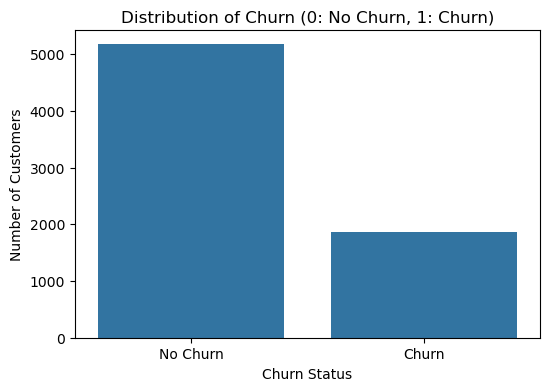

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn (0: No Churn, 1: Churn)')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn']) # Make labels more readable
plt.show()

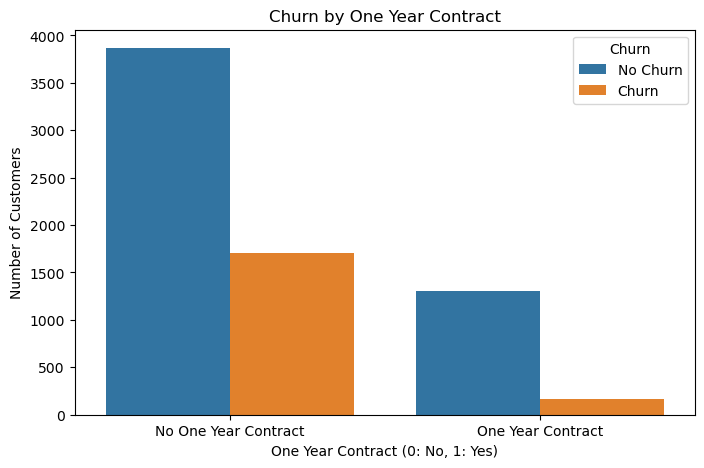

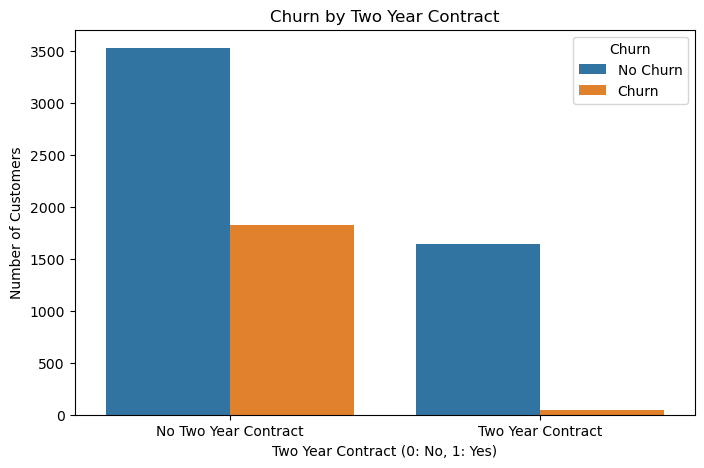

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract_One year', hue='Churn', data=df)
plt.title('Churn by One Year Contract')
plt.xlabel('One Year Contract (0: No, 1: Yes)')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1], labels=['No One Year Contract', 'One Year Contract'])
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Contract_Two year', hue='Churn', data=df)
plt.title('Churn by Two Year Contract')
plt.xlabel('Two Year Contract (0: No, 1: Yes)')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1], labels=['No Two Year Contract', 'Two Year Contract'])
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

# You can also analyze the base contract type if needed, but the one-hot encoded ones are good for initial view
# If you want to see the original contract types (Month-to-month, One year, Two year)
# df_original = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') # Reload original for specific view if desired
# sns.countplot(x='Contract', hue='Churn', data=df_original)
# plt.title('Churn by Contract Type (Original)')
# plt.show()

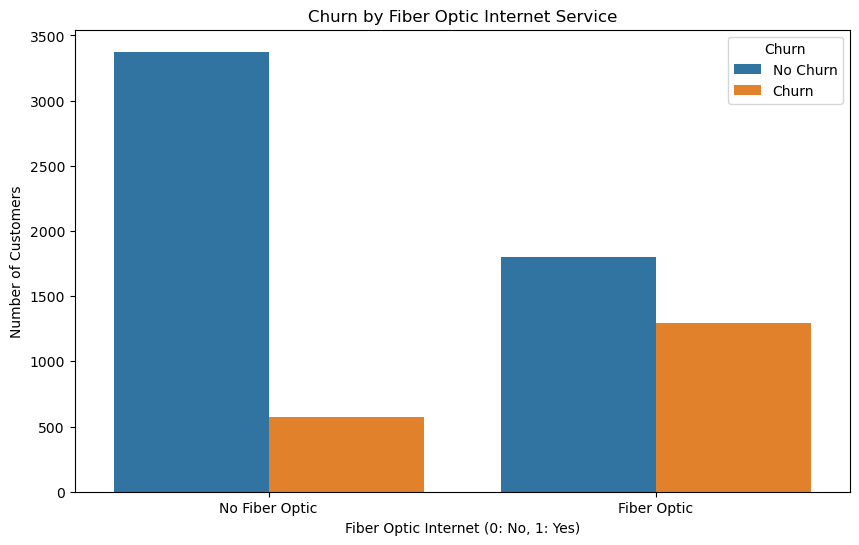

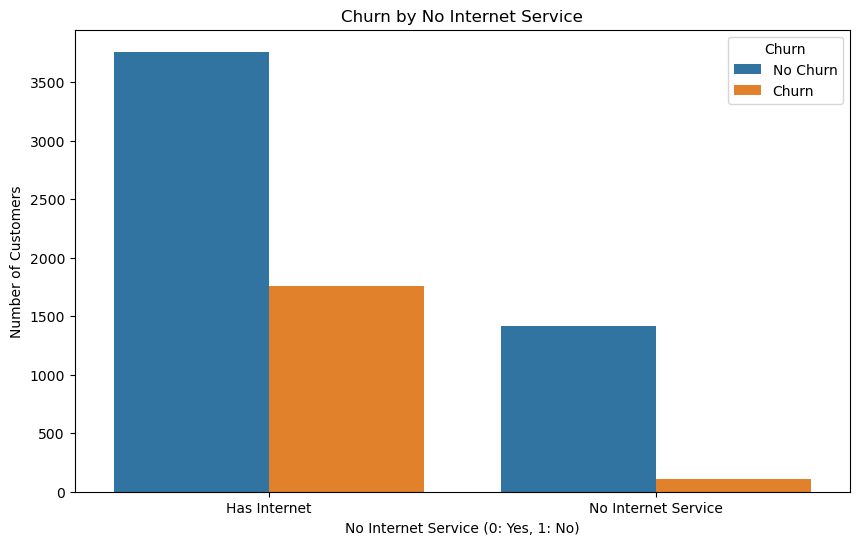

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService_Fiber optic', hue='Churn', data=df)
plt.title('Churn by Fiber Optic Internet Service')
plt.xlabel('Fiber Optic Internet (0: No, 1: Yes)')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1], labels=['No Fiber Optic', 'Fiber Optic'])
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService_No', hue='Churn', data=df)
plt.title('Churn by No Internet Service')
plt.xlabel('No Internet Service (0: Yes, 1: No)') # Note: check if 0 or 1 represents 'No Internet Service'
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1], labels=['Has Internet', 'No Internet Service'])
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

# You might also want to look at the original 'InternetService' categories if you remember them
# For example, if 'InternetService_DSL' was also created, you can plot that too.
# df.columns will show you all newly created columns for InternetService if you are unsure.

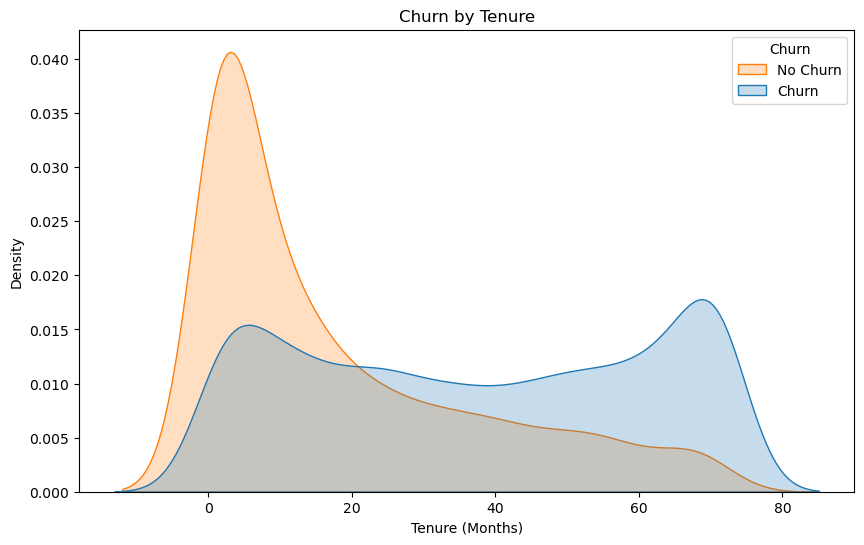

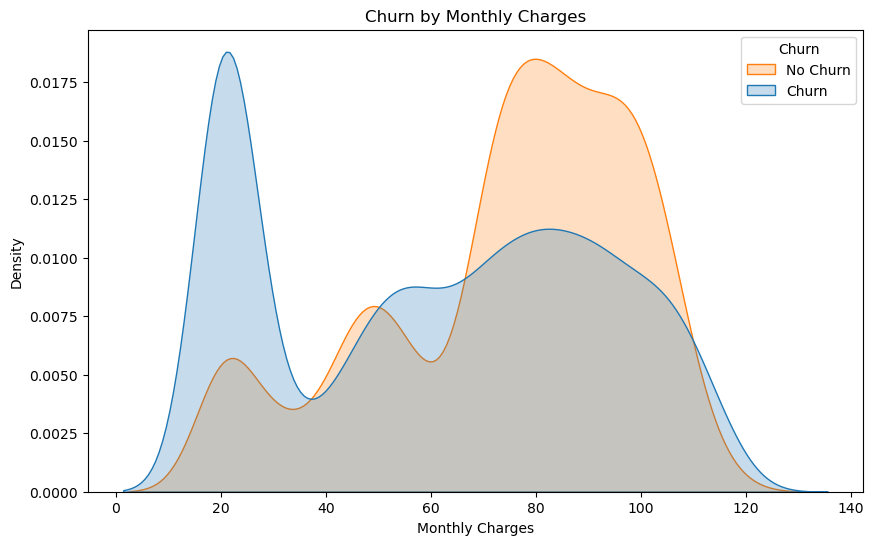

In [28]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x='tenure', hue='Churn', data=df, fill=True, common_norm=False)
plt.title('Churn by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Density')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(x='MonthlyCharges', hue='Churn', data=df, fill=True, common_norm=False)
plt.title('Churn by Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

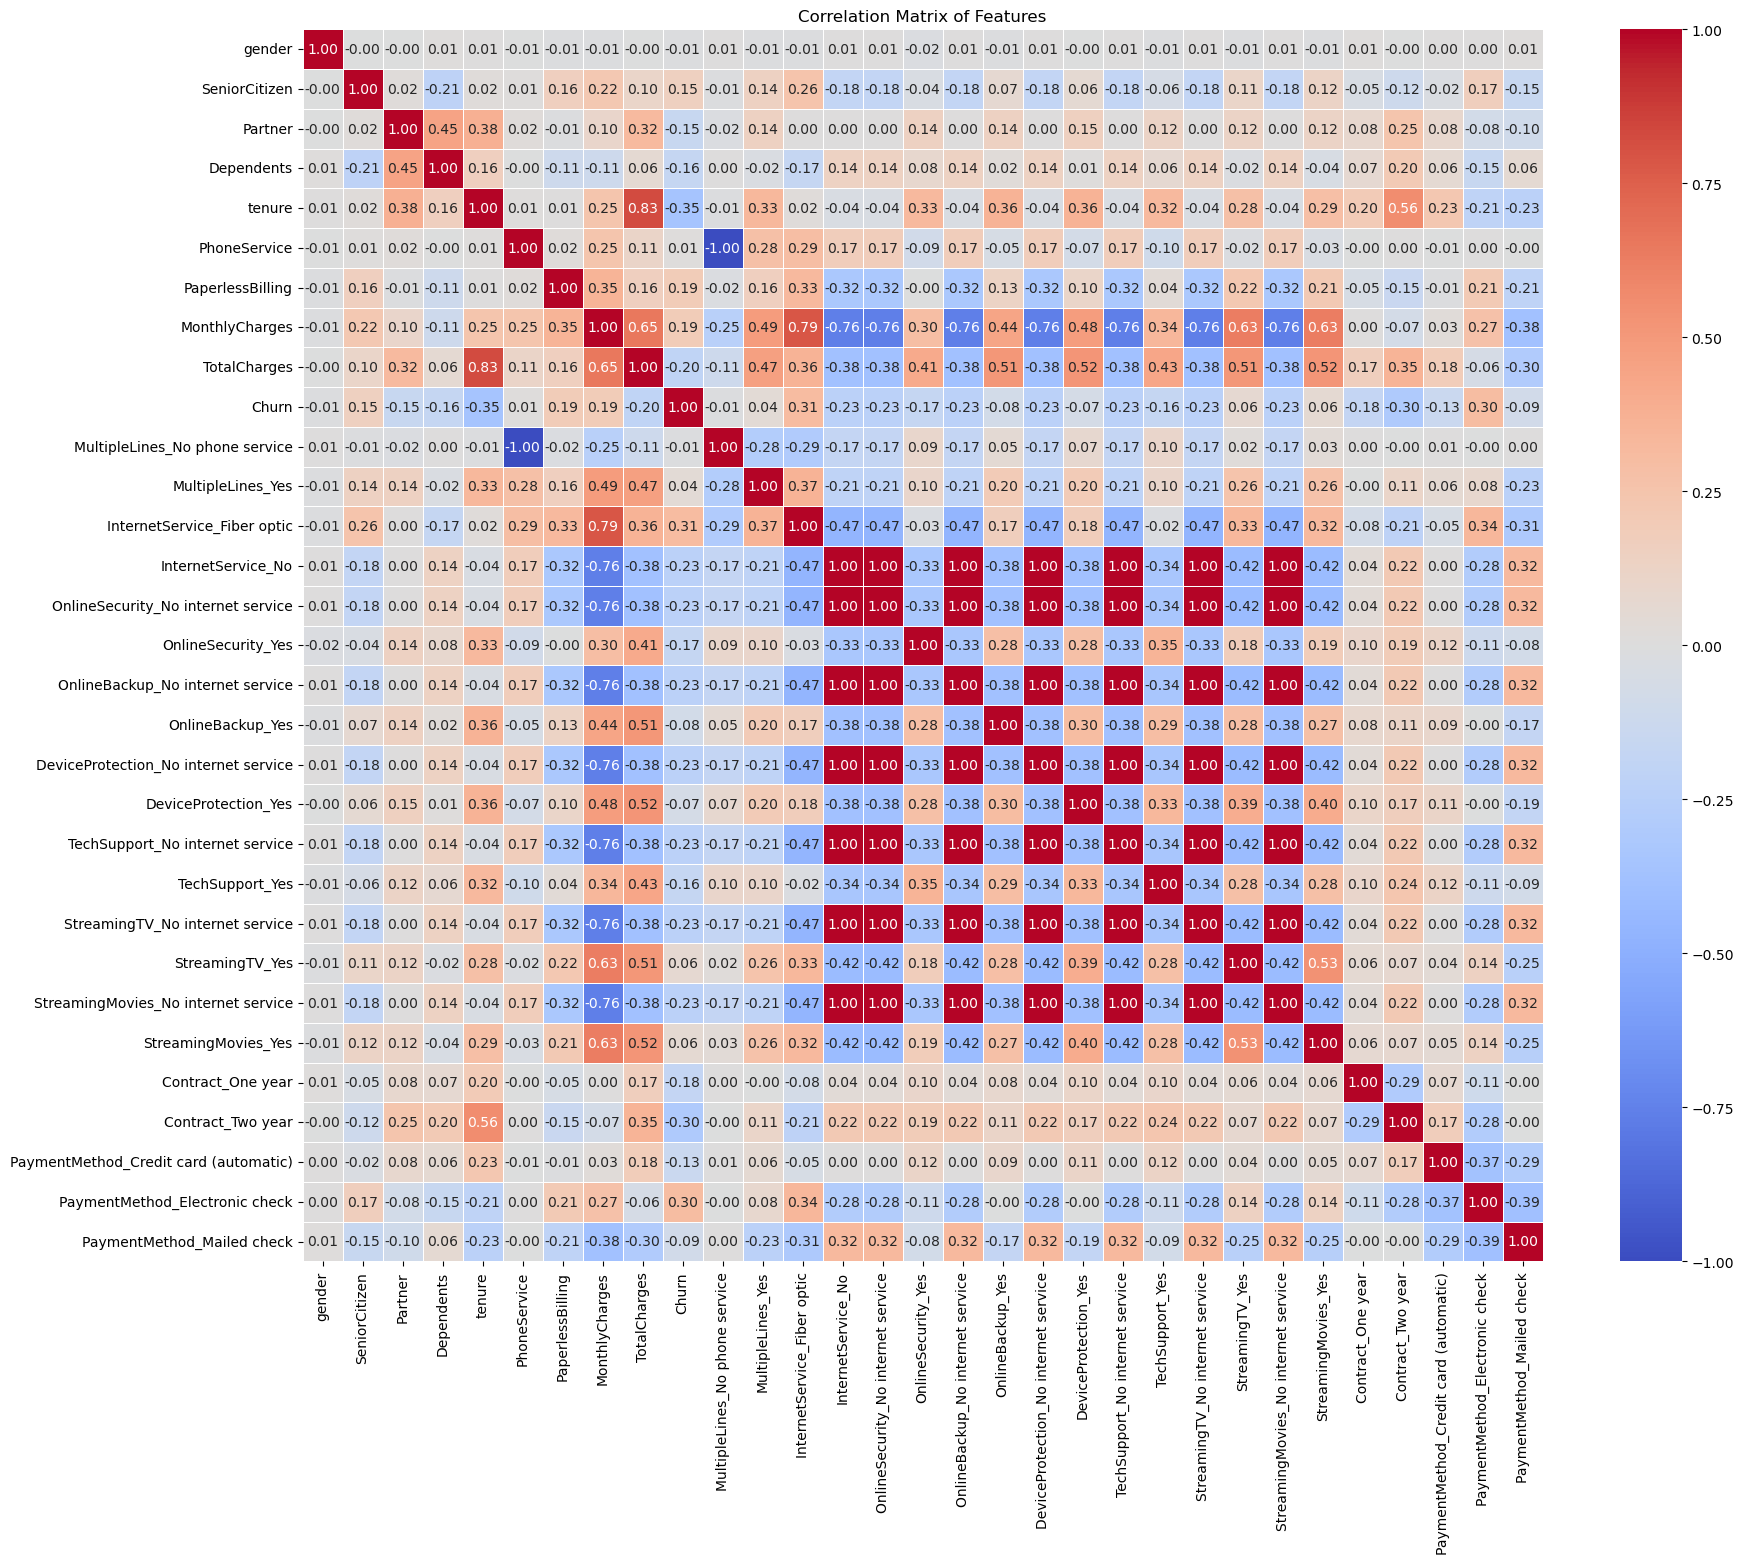

In [29]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix (optional, can be very large)
# print("Correlation Matrix:")
# print(correlation_matrix)

# Plotting the heatmap
plt.figure(figsize=(20, 16)) # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('Churn', axis=1) # X contains all columns except 'Churn'
y = df['Churn'] # y contains only the 'Churn' column

# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing
# random_state ensures reproducibility (you get the same split every time you run it)
# stratify=y ensures that the proportion of churn (0s and 1s) is the same in both training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the resulting sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5634, 30)
Shape of X_test: (1409, 30)
Shape of y_train: (5634,)
Shape of y_test: (1409,)


In [31]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale (excluding boolean columns created by one-hot encoding)
# We only need to scale 'tenure', 'MonthlyCharges', 'TotalCharges', and 'SeniorCitizen' (if treated as numerical)
# The bool columns are already 0/1 and don't need scaling in the same way.
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform X_train
# IMPORTANT: Fit ONLY on training data to prevent data leakage from the test set
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform X_test using the scaler fitted on X_train
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Numerical features in X_train scaled.")
print("Numerical features in X_test scaled.")

# You can optionally inspect a few rows to see the scaled values (they will be around 0)
# print("\nX_train head after scaling:")
# print(X_train[numerical_cols].head())

Numerical features in X_train scaled.
Numerical features in X_test scaled.


In [32]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
# random_state ensures reproducibility
model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' solver is good for small datasets and L1/L2 regularization

# Train the model using the training data
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


Model Accuracy: 0.8041

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.80      0.80      0.80      1409


Confusion Matrix:
[[925 110]
 [166 208]]


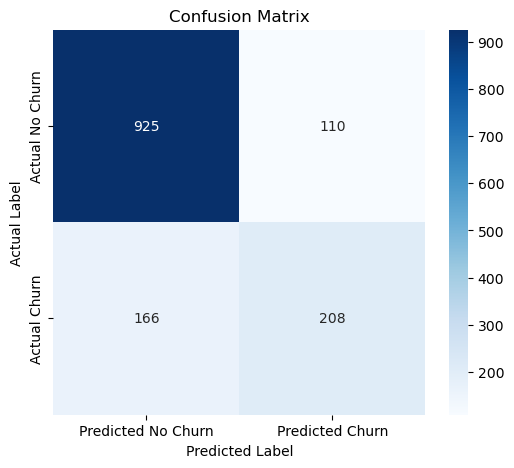

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}\n")

# Display Classification Report (Precision, Recall, F1-score)
# This provides detailed metrics for each class (0: No Churn, 1: Churn)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display Confusion Matrix
# This shows correct vs. incorrect predictions for each class
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix for better understanding
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

ROC AUC Score: 0.8425



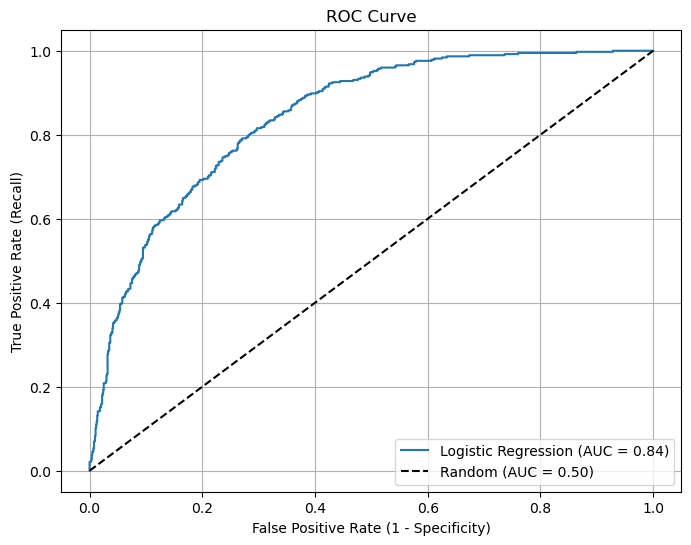

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np # For potential use later, or if needed here

# Get the predicted probabilities for the positive class (Churn = 1)
# model.predict_proba() returns probabilities for both classes [prob_0, prob_1]
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve points (False Positive Rate, True Positive Rate)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the Area Under the ROC Curve (AUC)
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {auc_score:.4f}\n")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)') # Baseline for random guess
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Top Features by Absolute Coefficient (Logistic Regression):
                           Feature  Coefficient  Absolute_Coefficient
26               Contract_Two year    -1.327830              1.327830
4                           tenure    -1.251444              1.251444
11     InternetService_Fiber optic     0.924180              0.924180
5                     PhoneService    -0.774728              0.774728
25               Contract_One year    -0.690373              0.690373
8                     TotalCharges     0.529046              0.529046
14              OnlineSecurity_Yes    -0.402752              0.402752
28  PaymentMethod_Electronic check     0.375083              0.375083
6                 PaperlessBilling     0.368071              0.368071
20                 TechSupport_Yes    -0.352480              0.352480
9   MultipleLines_No phone service    -0.317394              0.317394
10               MultipleLines_Yes     0.309639              0.309639
22                 StreamingTV

C:\Users\rohit\AppData\Local\Temp\ipykernel_5880\47902651.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Absolute_Coefficient', y='Feature', data=feature_importance_df.head(15), palette='viridis')


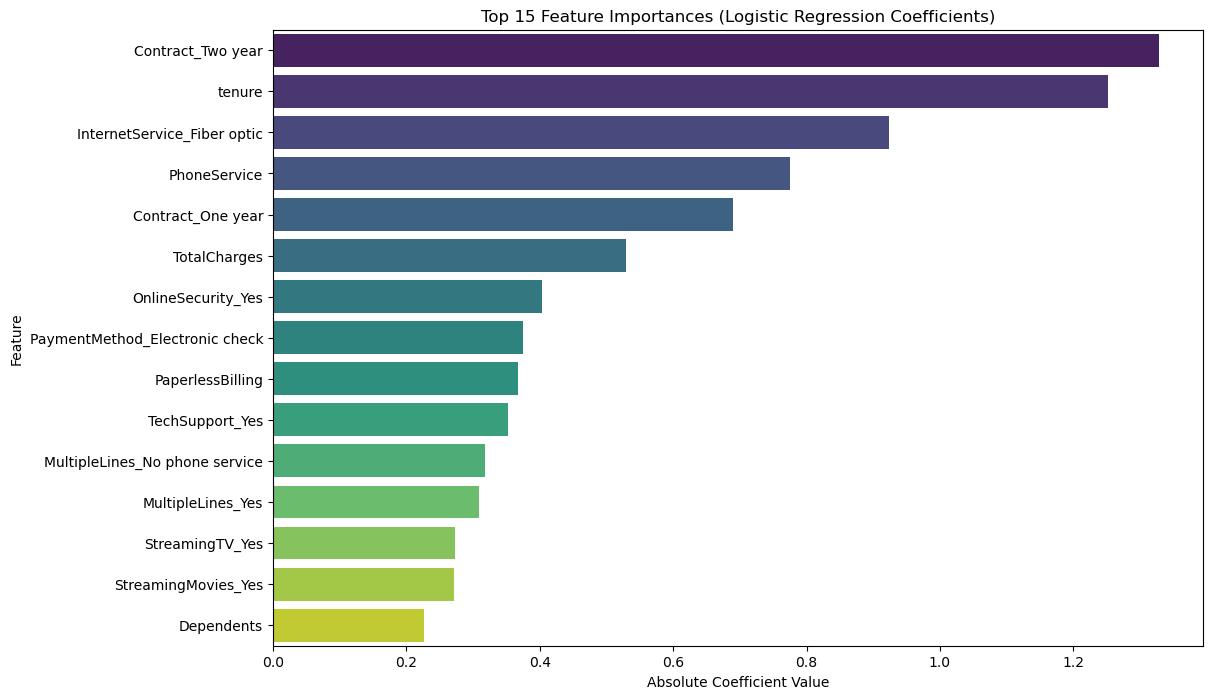

In [35]:
# Get the coefficients from the trained model
coefficients = model.coef_[0]

# Get the feature names from X_train
feature_names = X_train.columns

# Create a DataFrame to easily view and sort feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute coefficient value to see the strongest influences
feature_importance_df['Absolute_Coefficient'] = abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute_Coefficient', ascending=False)

print("Top Features by Absolute Coefficient (Logistic Regression):")
print(feature_importance_df.head(15)) # Display top 15 features

# Optionally, visualize the top features
plt.figure(figsize=(12, 8))
sns.barplot(x='Absolute_Coefficient', y='Feature', data=feature_importance_df.head(15), palette='viridis')
plt.title('Top 15 Feature Importances (Logistic Regression Coefficients)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
# n_estimators: The number of trees in the forest. More trees generally lead to better performance but take longer.
# random_state: For reproducibility
# class_weight: 'balanced' helps handle imbalanced datasets (like churn, where 'No Churn' is more frequent)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the Random Forest model using the training data
rf_model.fit(X_train, y_train)

print("Random Forest Classifier model trained successfully!")

Random Forest Classifier model trained successfully!


Random Forest Model Accuracy: 0.7906

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Random Forest Confusion Matrix:
[[932 103]
 [192 182]]


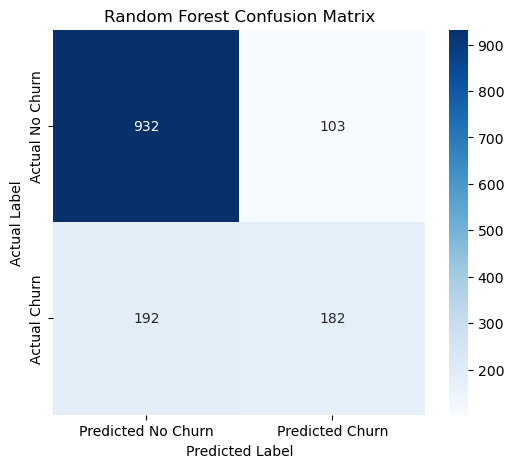

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set using the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Calculate Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.4f}\n")

# Display Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Display Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nRandom Forest Confusion Matrix:")
print(conf_matrix_rf)

# Visualize Confusion Matrix for better understanding
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Random Forest ROC AUC Score: 0.8276



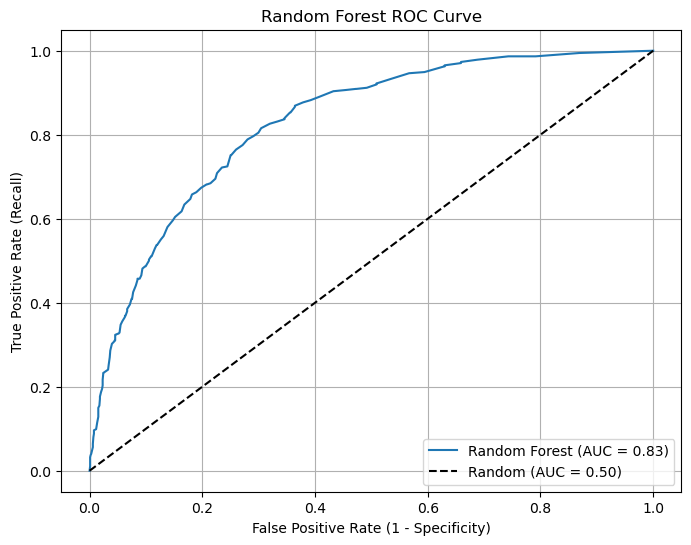

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (Churn = 1) from Random Forest
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve points
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

# Calculate AUC for Random Forest
auc_score_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"Random Forest ROC AUC Score: {auc_score_rf:.4f}\n")

# Plot the ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_score_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)') # Baseline
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Top Features by Importance (Random Forest):
                           Feature  Importance
8                     TotalCharges    0.182048
4                           tenure    0.165658
7                   MonthlyCharges    0.149320
26               Contract_Two year    0.053581
11     InternetService_Fiber optic    0.041023
28  PaymentMethod_Electronic check    0.040239
25               Contract_One year    0.028645
0                           gender    0.026218
14              OnlineSecurity_Yes    0.025060
6                 PaperlessBilling    0.024556
20                 TechSupport_Yes    0.024123
2                          Partner    0.021758
16                OnlineBackup_Yes    0.019828
3                       Dependents    0.019035
18            DeviceProtection_Yes    0.018162


C:\Users\rohit\AppData\Local\Temp\ipykernel_5880\2054674027.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df_rf.head(15), palette='magma')


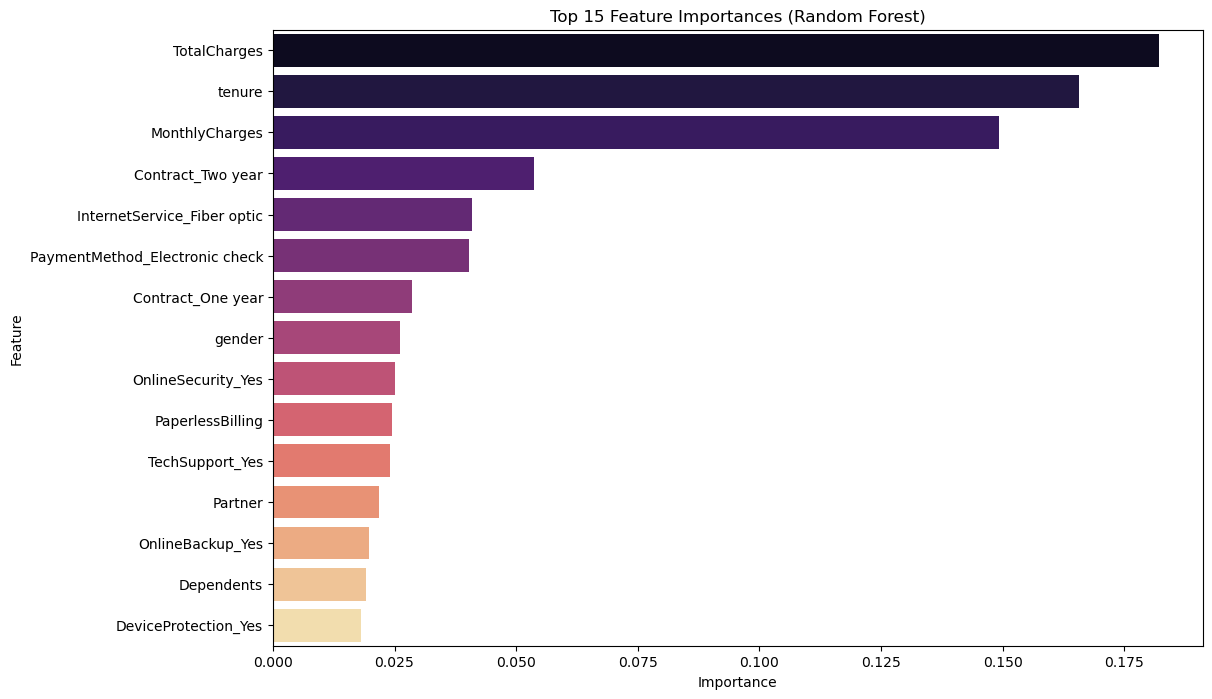

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances_rf = rf_model.feature_importances_

# Get the feature names from X_train
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_rf
})

# Sort features by importance
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

print("Top Features by Importance (Random Forest):")
print(feature_importance_df_rf.head(15)) # Display top 15 features

# Visualize the top features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_rf.head(15), palette='magma')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()